# EXPERIMENT 8

###### Step 1:  Problem Statement
Perform classification using Naive Bayes on the IRIS dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Step 2: Data Collection

In [2]:
df = pd.read_csv(r'../6ML SEM 6/datasets/Iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###### Step 3: Exploratory Data Analysis

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking for NaN values in the dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2b2e0fb1100>,
 'caps': [<matplotlib.lines.Line2D at 0x2b2e0fb17c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b2def99d60>,
 'medians': [<matplotlib.lines.Line2D at 0x2b2e0fb1e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b2e0fbb250>,
 'means': []}

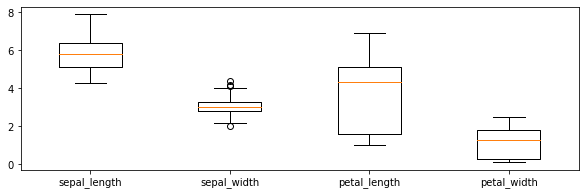

In [9]:
# Visualizing the outliers
fig=plt.figure(figsize=(10,3))
plt.boxplot(df[["sepal_length", "sepal_width", "petal_length", "petal_width"]], labels = ["sepal_length", "sepal_width", "petal_length", "petal_width"])

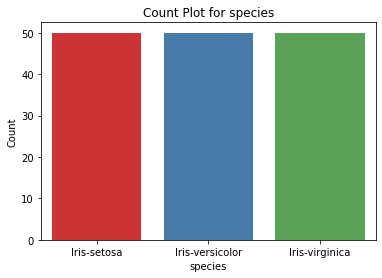

In [10]:
countplot = sns.countplot(x=df['species'], data=df, palette='Set1')
plt.xlabel('species')
plt.ylabel('Count')
plt.title('Count Plot for species')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


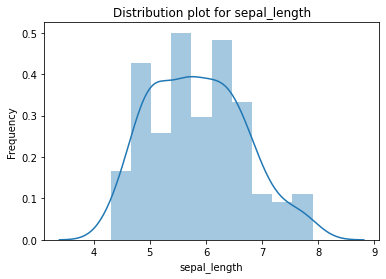

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


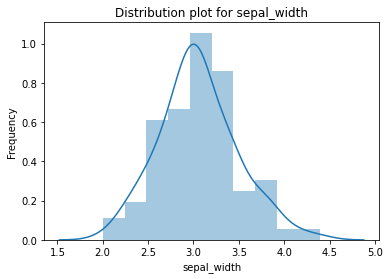

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


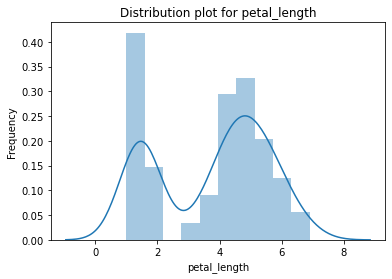

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


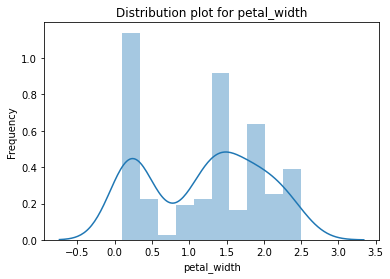

In [11]:
# Visualization of the features of the dataset using Distribution Plots
for cols in ["sepal_length", "sepal_width", "petal_length", "petal_width"]:
    distributionplot = sns.distplot(a=df[cols], bins=10, hist=True, kde=True)
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.title('Distribution plot for ' + cols)
    plt.show()

###### Step 4: Data Preprocessing

Data Preprocessing on Train Data

In [12]:
# Input DataFrame
X=df.iloc[:,0:-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# Target DataFrame
Y=df.iloc[:,-1]
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b2e27c5460>,
 'caps': [<matplotlib.lines.Line2D at 0x2b2e27c5b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b2e27c5100>,
 'medians': [<matplotlib.lines.Line2D at 0x2b2e27d1220>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b2e27d1580>,
 'means': []}

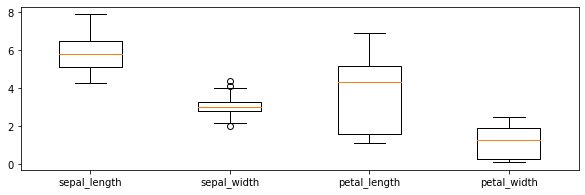

In [15]:
# Visualizing the outliers
fig=plt.figure(figsize=(10,3))
plt.boxplot(X_train[["sepal_length", "sepal_width", "petal_length", "petal_width"]], labels = ["sepal_length", "sepal_width", "petal_length", "petal_width"])

Text(0.5, 1.0, 'Scatter Plot before Outlier Handling')

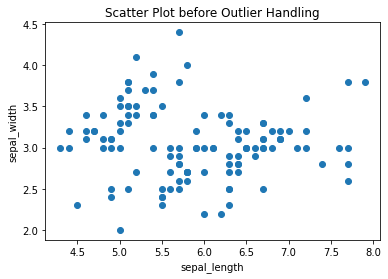

In [16]:
#Visualization using Scatter Plot before Outlier Handling
plt.scatter(X_train['sepal_length'],X_train['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Scatter Plot before Outlier Handling')

In [17]:
# Handling the outliers using quantile-based Capping and Flooring techniqueupper_limit = X_train['bmi'].quantile(0.99)
upper_limit = X_train['sepal_width'].quantile(0.99)
lower_limit = X_train['sepal_width'].quantile(0.01)
X_train['sepal_width'] = np.where(X_train['sepal_width'] >= upper_limit, upper_limit,
        np.where(X_train['sepal_width'] <= lower_limit, lower_limit, X_train['sepal_width']))

Text(0.5, 1.0, 'Scatter Plot after Outlier Handling')

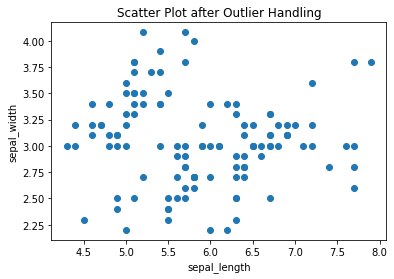

In [18]:
#Visualization using Scatter Plot after Outlier Handling
plt.scatter(X_train['sepal_length'],X_train['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Scatter Plot after Outlier Handling')

###### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.09544771, -0.6025416 ,  0.72247648,  1.51195265],
       [ 0.14071157, -2.03612149,  0.10361279, -0.29851096],
       [-0.44968663,  2.74247816, -1.35915595, -1.3330616 ],
       [ 1.6757469 , -0.36361161,  1.39760052,  0.73603967],
       [-1.04008484,  0.8310383 , -1.30289562, -1.3330616 ],
       [ 0.49495049,  0.59210832,  1.22881951,  1.64127148],
       [-1.04008484,  1.06996828, -1.41541629, -1.20374277],
       [ 0.96726906,  0.11424835,  0.49743514,  0.34808318],
       [ 1.0853487 , -0.6025416 ,  0.55369548,  0.21876435],
       [ 0.25879121, -0.6025416 ,  0.10361279,  0.08944552],
       [ 0.25879121, -1.08040156,  1.00377816,  0.21876435],
       [ 0.61303014,  0.35317834,  0.38491447,  0.34808318],
       [ 0.25879121, -0.6025416 ,  0.49743514, -0.03987331],
       [ 0.73110978, -0.6025416 ,  0.4411748 ,  0.34808318],
       [ 0.25879121, -0.36361161,  0.49743514,  0.21876435],
       [-1.15816448,  0.11424835, -1.30289562, -1.46238043],
       [ 0.14071157, -0.

###### Step 5: Model Building

In [20]:
from sklearn.naive_bayes import GaussianNB
model_naive_bayes = GaussianNB()

model_naive_bayes.fit(X_train,Y_train)

Y_pred_train_naive_bayes = model_naive_bayes.predict(X_train)
Y_pred_test_naive_bayes = model_naive_bayes.predict(X_test)

###### Step 6: Model Evaluation


Confusion Matrix:



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


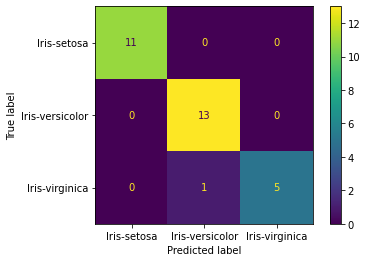

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, fbeta_score, roc_auc_score, roc_curve, RocCurveDisplay, plot_confusion_matrix

print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_naive_bayes,X_test, Y_test) 

In [24]:
print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_naive_bayes)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_naive_bayes)))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_naive_bayes))

Train accuracy: 0.95
Test accuracy: 0.9666666666666667

Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

